In [397]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [398]:
# Load raw data
residential = pd.read_csv('residential_consumption.csv')
commercial = pd.read_csv('commercial_consumption.csv')

In [399]:
# Get year and month into correct format, extract month for easier analysis later on.
# Create million gallons consumption column
# Create column to identify user type in combined df
commercial['Year Month'] = pd.to_datetime(commercial['Year Month'], format='%Y%m')
commercial['month'] = commercial['Year Month'].dt.month
commercial['Total MG'] = commercial['Total Gallons'] / 10**6
commercial['user group'] = 'commercial'

residential['Year Month'] = pd.to_datetime(residential['Year Month'], format='%Y%m')
residential['month'] = residential['Year Month'].dt.month
residential['Total MG'] = residential['Total Gallons'] / 10**6
residential['user group'] = 'residential'

In [400]:
residential.tail()

,Year Month,Postal Code,Customer Class,Total Gallons,month,Total MG,user group
11127,2017-10-01,78759,Irrigation - Residential,11400,10,0.0114,residential
11128,2017-10-01,78759,Multi-Family,4135000,10,4.1350,residential
11129,2017-10-01,78759,Residential,20760300,10,20.7603,residential
11130,2017-10-01,78759,Irrigation - Multi-Family,102100,10,0.1021,residential
11131,2044-06-01,78753,Irrigation - Multi-Family,0,6,0.0000,residential


In [401]:
commercial.head()

,Year Month,Postal Code,Customer Class,Total Gallons,month,Total MG,user group
0,2012-01-01,78613,Irrigation - Commercial,855400,1,0.8554,commercial
1,2012-01-01,78613,Commercial,2880800,1,2.8808,commercial
2,2012-01-01,78617,Austin Water Utility,438700,1,0.4387,commercial
3,2012-01-01,78617,City of Austin,6500300,1,6.5003,commercial
4,2012-01-01,78617,Commercial,9120500,1,9.1205,commercial


In [402]:
# Join data frames
df = pd.concat([commercial, residential])

In [403]:
# Drop last month of data (October 2017), appears incomplete relative to other months.
df.groupby(['Year Month']).count()
df = df[df['Year Month'] != '2017-10-01']
print(df.shape)
df.head()

(25155, 7)


,Year Month,Postal Code,Customer Class,Total Gallons,month,Total MG,user group
0,2012-01-01,78613,Irrigation - Commercial,855400,1,0.8554,commercial
1,2012-01-01,78613,Commercial,2880800,1,2.8808,commercial
2,2012-01-01,78617,Austin Water Utility,438700,1,0.4387,commercial
3,2012-01-01,78617,City of Austin,6500300,1,6.5003,commercial
4,2012-01-01,78617,Commercial,9120500,1,9.1205,commercial


In [404]:
df.describe()

,Postal Code,Total Gallons,month,Total MG
count,25155.000000,2.515500e+04,25155.000000,25155.000000
mean,78725.982508,9.246963e+06,6.314053,9.246963
std,31.392961,1.761222e+07,3.387118,17.612223
min,78613.000000,-9.410000e+04,1.000000,-0.094100
25%,78719.000000,1.152000e+05,3.000000,0.115200
50%,78731.000000,1.616200e+06,6.000000,1.616200
75%,78748.000000,1.090885e+07,9.000000,10.908850
max,78759.000000,2.215730e+08,12.000000,221.573000


In [405]:
# Identify index of negative consumption
df.index[df['Total Gallons'] < 0]

Int64Index([12585], dtype='int64')

In [406]:
df.at[12585, 'Total Gallons']

-94100

In [407]:
df.at[12585, 'Total Gallons'] = 94100
df.at[12585, 'Total MG'] = 94100 / 10**6

In [408]:
# Drop erroneous future date
df[df['Year Month'].dt.year > 2018]

,Year Month,Postal Code,Customer Class,Total Gallons,month,Total MG,user group
11131,2044-06-01,78753,Irrigation - Multi-Family,0,6,0.0,residential


In [409]:
df = df.drop(index=11131)

In [410]:
df.describe()

,Postal Code,Total Gallons,month,Total MG
count,25153.000000,2.515300e+04,25153.000000,25153.000000
mean,78725.981473,9.247670e+06,6.314038,9.247670
std,31.393747,1.761274e+07,3.387249,17.612744
min,78613.000000,0.000000e+00,1.000000,0.000000
25%,78719.000000,1.152000e+05,3.000000,0.115200
50%,78731.000000,1.616400e+06,6.000000,1.616400
75%,78748.000000,1.090990e+07,9.000000,10.909900
max,78759.000000,2.215730e+08,12.000000,221.573000


In [411]:
# Summary statistics, consumption by user group
df['Total MG'].groupby(df['user group']).describe()

,count,mean,std,min,25%,50%,75%,max
user group,,,,,,,,
commercial,14165.0,6.698725,15.772606,0.0,0.096000,1.14420,6.136400,221.5730
residential,10988.0,12.533601,19.242142,0.0,0.158925,2.81955,17.381425,125.5698


In [412]:
# Summary stats by customer class
df['Total MG'].groupby(df['Customer Class']).describe()

,count,mean,std,min,25%,50%,75%,max
Customer Class,,,,,,,,
Austin Water Utility,1697.0,0.169340,0.383053,0.0000,0.000000,0.01230,0.15360,7.1334
City of Austin,2363.0,1.290264,2.438765,0.0000,0.049550,0.28390,1.41850,22.4996
Commercial,3209.0,14.215656,14.928989,0.0000,4.151500,10.32120,18.46500,101.3278
Irrigation - City of Austin,2143.0,0.319666,0.728500,0.0000,0.000200,0.03200,0.26650,6.3943
Irrigation - Commercial,3135.0,3.423722,3.557033,0.0000,0.772500,2.28040,4.97515,25.2807
Irrigation - Large Volume,69.0,16.871883,5.703679,6.5793,12.469200,16.41340,20.96900,33.3161
Irrigation - Multi-Family,2533.0,1.736723,2.103996,0.0000,0.329000,0.93520,2.33800,16.7382
Irrigation - Residential,2383.0,0.097990,0.250573,0.0000,0.007600,0.02460,0.06635,2.7040
Large Volume,515.0,34.374259,46.141304,0.1507,5.601900,20.73600,34.48300,221.5730


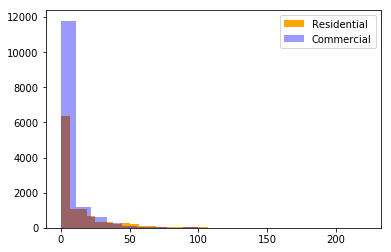

In [413]:
# Histogram of consumption by user group
plt.hist(df[df['user group'] == 'residential']['Total MG'], bins=20, label='Residential', color='orange', alpha=1)
plt.hist(df[df['user group'] == 'commercial']['Total MG'], bins=20, label='Commercial', color='blue', alpha=0.4)
plt.legend()
plt.show()

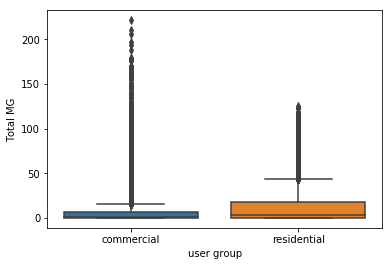

In [414]:
# Boxplot of consumption by user group
import seaborn as sns
sns.boxplot(x=df['user group'], y=df['Total MG'])
plt.show()

In [416]:
# Create combined consumption dataframe grouped by month to use for time series analysis
combined = pd.DataFrame(df.groupby(df['Year Month'])['Total MG'].agg('sum'))
combined['residential'] = residential.groupby(residential['Year Month'])['Total MG'].agg('sum')
combined['commercial'] = commercial.groupby(commercial['Year Month'])['Total MG'].agg('sum')
combined['month'] = combined.index.month
combined.head()

,Total MG,residential,commercial,month
Year Month,,,,
2012-01-01,2824.965400,1729.505300,1095.4601,1
2012-02-01,2578.886100,1512.256300,1066.6298,2
2012-03-01,2780.603943,1648.251343,1132.3526,3
2012-04-01,2945.526089,1766.880389,1178.6457,4
2012-05-01,3627.308668,2212.475768,1414.8329,5


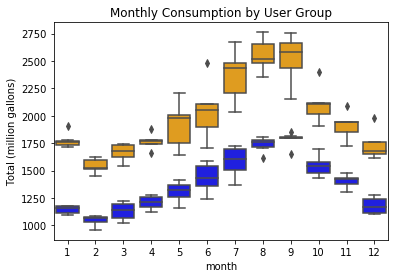

In [417]:
# Look at total consumption by month
#sns.boxplot(x=combined['month'], y=combined['Total MG'], color='green')
sns.boxplot(x=combined['month'], y=combined.residential, color='orange')
sns.boxplot(x=combined['month'], y=combined.commercial, color='blue')
plt.ylabel('Total (million gallons)')
plt.title('Monthly Consumption by User Group')
plt.show()

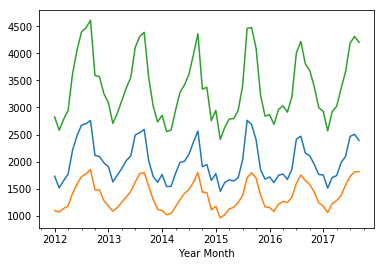

In [418]:
combined.residential.plot()
combined.commercial.plot()
combined['Total MG'].plot()
plt.show()

In [437]:
df.groupby(df['Customer Class']).count()

,Year Month,Postal Code,Total Gallons,month,Total MG,user group
Customer Class,,,,,,
Austin Water Utility,1697,1697,1697,1697,1697,1697
City of Austin,2363,2363,2363,2363,2363,2363
Commercial,3209,3209,3209,3209,3209,3209
Irrigation - City of Austin,2143,2143,2143,2143,2143,2143
Irrigation - Commercial,3135,3135,3135,3135,3135,3135
Irrigation - Large Volume,69,69,69,69,69,69
Irrigation - Multi-Family,2533,2533,2533,2533,2533,2533
Irrigation - Residential,2383,2383,2383,2383,2383,2383
Large Volume,515,515,515,515,515,515


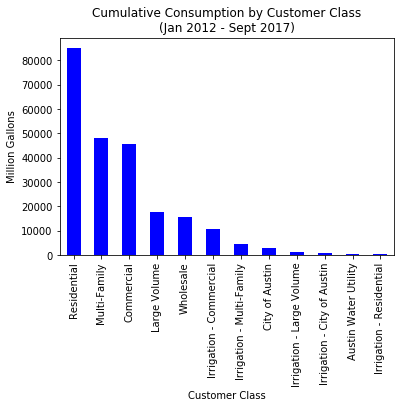

In [521]:
df.groupby(df['Customer Class'])['Total MG'].agg('sum').sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Cumulative Consumption by Customer Class\n(Jan 2012 - Sept 2017)')
plt.ylabel('Million Gallons')
plt.show()

In [508]:
print(len(df['Customer Class'].unique()))
df['Customer Class'].unique()

12


array(['Irrigation - Commercial', 'Commercial', 'Austin Water Utility',
       'City of Austin', 'Irrigation - City of Austin', 'Wholesale',
       'Large Volume', 'Irrigation - Large Volume', 'Multi-Family',
       'Irrigation - Multi-Family', 'Residential',
       'Irrigation - Residential'], dtype=object)

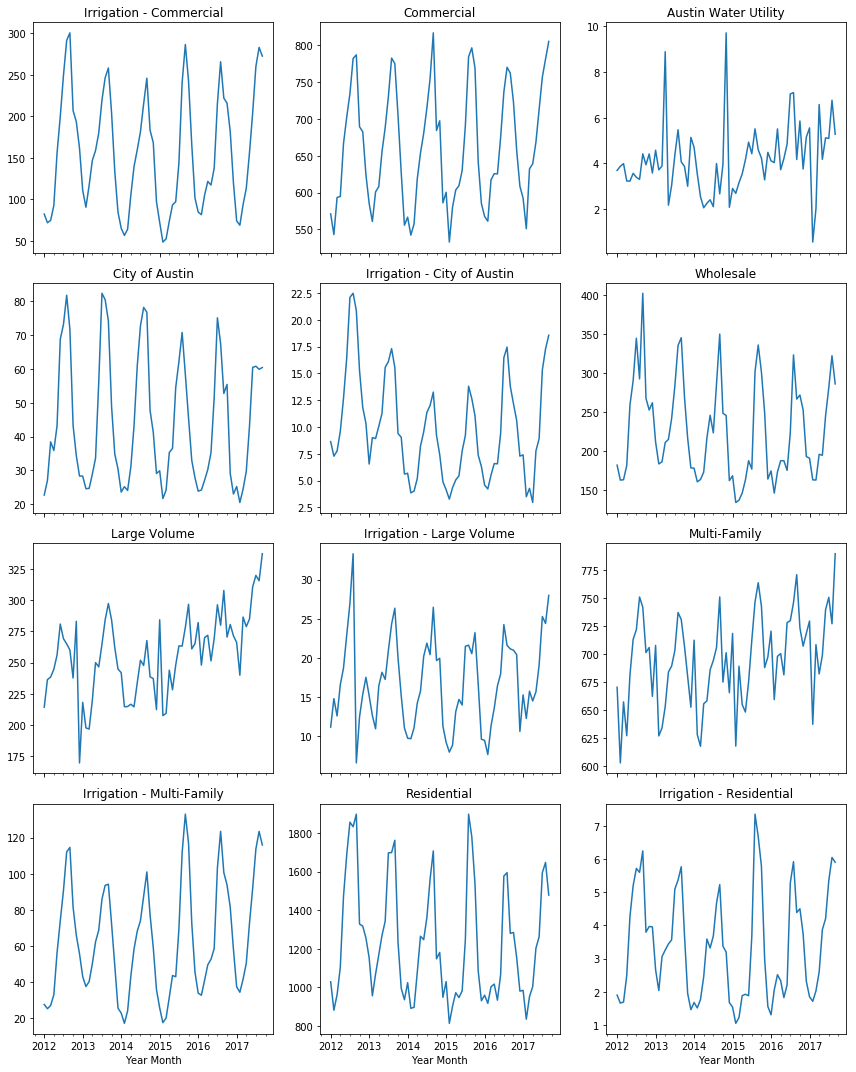

In [519]:
plt.figure(figsize=(12,15))

i = 1
for value in df['Customer Class'].unique():
    plt.subplot(4, 3, i)
    df[df['Customer Class'] == value].groupby('Year Month')['Total MG'].agg('sum').plot(sharex=True)
    plt.title(value)
    i+=1

plt.tight_layout()
plt.show()

In [525]:
# Evaluate stationarity of overall consumption and consumption by customer class
from statsmodels.tsa.stattools import adfuller

x = 


for value in df['Customer Class'].unique():
    x = df[df['Customer Class'] == value]['Total MG']
    result = adfuller(x)
    print('Customer Class: ', value)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1], '\n')


Customer Class:  Irrigation - Commercial
ADF Statistic: -4.487362
p-value: 0.000207 

Customer Class:  Commercial
ADF Statistic: -18.857496
p-value: 0.000000 

Customer Class:  Austin Water Utility
ADF Statistic: -9.684634
p-value: 0.000000 

Customer Class:  City of Austin
ADF Statistic: -9.115091
p-value: 0.000000 

Customer Class:  Irrigation - City of Austin
ADF Statistic: -5.039819
p-value: 0.000018 

Customer Class:  Wholesale
ADF Statistic: -3.717355
p-value: 0.003876 

Customer Class:  Large Volume
ADF Statistic: -0.642227
p-value: 0.861152 

Customer Class:  Irrigation - Large Volume
ADF Statistic: -6.536999
p-value: 0.000000 

Customer Class:  Multi-Family
ADF Statistic: -24.434547
p-value: 0.000000 

Customer Class:  Irrigation - Multi-Family
ADF Statistic: -4.519073
p-value: 0.000182 

Customer Class:  Residential
ADF Statistic: -8.998227
p-value: 0.000000 

Customer Class:  Irrigation - Residential
ADF Statistic: -6.008041
p-value: 0.000000 

